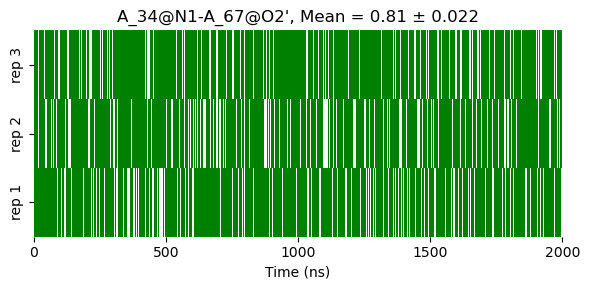

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns

# Define the prefix path to your data files
prefix = "/Users/akiny/OneDrive - University of Rochester/projects/yoshita_ribo"

def hbond(system, rep_id, resid_pair, donor_acceptor_pair, resolution):
    """
    Retrieves hydrogen bond data for a specific run and residue pair from the dataset.
    
    Args:
        system (str): Name of the system directory within the prefix path.
        run (int): Run number to specify the dataset.
        resid_pair (str): Residue pair identifier to locate the correct data file.
        donor_acceptor_pair (str): The specific donor-acceptor pair to match in column names.
        resolution (int): Interval for downsampling the data.
    
    Returns:
        list: Downsampled list of hydrogen bond values.
    """
    # Load the dataset
    file_path = f"{prefix}/{system}/run{rep_id}/hb.{resid_pair}.series.dat"
    data = pd.read_csv(file_path, delim_whitespace=True)
    
    # Identify columns that contain the specified donor-acceptor pair
    common_cols = [key for key in data.columns if donor_acceptor_pair in key]
    
    # Sum the values of the identified columns and downsample the result
    summed_data = np.sum(data[common_cols], axis=1)
    return summed_data[::resolution].tolist()

def hbond_avg(system, rep_id, resid_pair, donor_acceptor_pair):
    """
    Compute the average of hydrogen bond values for a specific run and residue pair.
    
    Args:
        system (str): Name of the system directory within the prefix path.
        run (int): Run number to specify the dataset.
        resid_pair (str): Residue pair identifier to locate the correct data file.
        donor_acceptor_pair (str): The specific donor-acceptor pair to match in column names.
    
    Returns:
        float: Average of hydrogen bond values.
    """
    return np.mean(hbond(system, rep_id, resid_pair, donor_acceptor_pair, resolution=1))

def hbond_plot(system, resid_pair, donor_acceptor_pair, n_replicates, resolution):
    """
    Plot a heatmap of hydrogen bond values across different replicates.
    
    Args:
        system (str): Name of the system directory within the prefix path.
        resid_pair (str): Residue pair identifier to locate the correct data file.
        donor_acceptor_pair (str): The specific donor-acceptor pair to match in column names.
        n_replicates (int): Number of replicate runs to include in the plot.
        resolution (int): Interval for downsampling the data.
    
    Returns:
        None
    """
    cmap = mpl.colors.ListedColormap(['white', 'green'])
    
    # Prepare figure and axis for plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # Collect hydrogen bond data for each run
    run_indexes = list(range(n_replicates, 0, -1))
    hb_data = [hbond(system, run, resid_pair, donor_acceptor_pair, resolution) for run in run_indexes]
    means = [hbond_avg(system, run, resid_pair, donor_acceptor_pair) for run in run_indexes]
    
    # Compute mean and standard deviation of hydrogen bond averages
    hb_mean = np.mean(means)
    hb_std = np.std(means)
    
    # Create DataFrame for plotting
    hb_df = pd.DataFrame(hb_data).T
    hb_df.columns = [f"rep {i}" for i in run_indexes]
    hb_df = hb_df.T
    
    # Plot heatmap
    sns.heatmap(hb_df, cmap=cmap, cbar=False, ax=ax)
    
    # Set axis labels and title
    ax.set_xticks(np.arange(0, len(hb_data[0])+1, len(hb_data[0])/4))
    ax.set_xticklabels(np.arange(0, 2001, 500))  # Convert to ns
    ax.set_xlabel("Time (ns)")
    
    mean_str = format(hb_mean, ".2f")
    std_str = format(hb_std, ".3f")
    ax.set_title(f"{donor_acceptor_pair}, Mean = {mean_str} ± {std_str}")
    
    # Finalize and save the plot
    plt.xticks(rotation=360)
    fig.tight_layout()
    plt.savefig(f"{prefix}/{system}/hbonds/{donor_acceptor_pair}.pdf")

### Example function call
hbond_plot("4rzd", "34-67", "A_34@N1-A_67@O2'", 3, 20)